<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватели ФКН НИУ ВШЭ Кашницкий Юрий, Надежда Чиркова и Талгат Даулбаев
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинары 7 и 8. Теория вероятностей и математическая статистика

## Часть 3. Bootstrap

Bootstrap - это эмпирический способ оценки параметров распределений. Часто позволяет получить ответы на вопросы, появляющиеся при практическом анализе данных, методом "грубой силы". [Пример](https://habrahabr.ru/post/192000/)

Метод bootstrab заключается в следующем. Пусть имеется выборка $X$ размера $N$. Равномерно возьмем из выборки $N$ объектов с возвращением. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $X_1$. Повторяя процедуру $M$ раз, сгенерируем $M$ подвыборок $X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

Например, предположим, что мы хотим оценить средний вес среди всех людей в мире. У нас нет возможности взвесить всех людей, но мы можем взять небольшую выборку размера $N$ и взвесить всех этих людей. По такой выборке мы можем только оценить среднее. Однако чтобы делать выводы и генеральной совокупности, нам необходимо больше информации и разбросе среднего, как если бы мы оценили средний вес по нескольким таким выборкам.

С помощью бутстрэпа мы можем получить большое число выборок, каждая из которых является выборкой с возвращением из нашей исходной выборки, и по каждой из них оценить средний вес. По этим оценкам мы можем построить гистограмму таких средних, которая позволяет оценить форму распределения среднего веса. Рассмотрим пример:

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


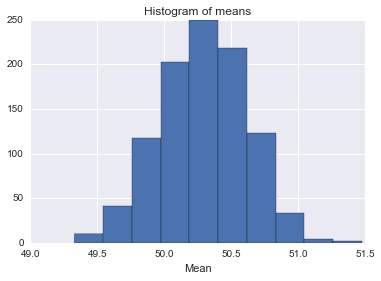

In [29]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
import numpy as np
from sklearn.utils import resample

N = 1000 # Sample size
M = 1000 # Number of bootstrap samples
X = 50.0 + 10 * np.random.randn(N) # Initial sample

# Resampling M times with replacement from X and estimating mean every time
means = [np.mean(resample(X)) for i in range(M)] 
    
plt.hist(means)
plt.title('Histogram of means')
plt.xlabel('Mean')

Bootstrap нашел отличное применение в машинном обучении - составление ансамблей алгоритмов, каждый из которых обучен на разных подвыборках данных. Но об этом - далее в курсе. 

**Еще примеры**

Сгенериурем выборку из нормального распределения, затем оценим по ней параметры и сравним с исходными.

In [30]:
sample = np.random.normal(loc=1, scale=5, size=10000)
mean = sample.mean()
scale = sample.var()

In [31]:
mean, np.sqrt(scale)

(1.0535927190315209, 4.9887315895976059)

Сравним результаты для выборок разных размеров:

In [32]:
for n in [100, 1000, 10000]:
    subsample = np.random.choice(sample, n)
    print(subsample.mean(), np.sqrt(subsample.var()))

1.69960695006 5.07581742047
1.02099981325 4.95893311938
1.02038716133 4.99948565686


Теперь то же самое для многомерного нормального распределения:

In [33]:
mean = np.array([5, 10])
cov = np.array([[1, 0.5], [0.5, 1]])
sample = np.random.multivariate_normal(mean=mean, cov=cov, size=10**7)
print(sample.mean(axis=0))
print(np.cov(sample.T))

[  5.00020283  10.00039938]
[[ 1.00034041  0.50013728]
 [ 0.50013728  1.00015386]]


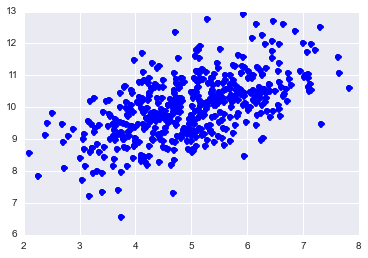

In [34]:
plt.plot(sample[:500, 0], sample[:500, 1], "bo")

In [35]:
for n in [100, 1000, 10000]:
    rand_ind = np.random.choice(range(len(sample)), n)
    subsample = sample[rand_ind,:]
    print(subsample.mean(axis=0))

[  5.20636236  10.07271086]
[  4.98622108  10.05167263]
[ 4.98130796  9.97399007]


Многомерное нормальное распределение представляет собой облако точек в пространстве; на плоскости это выглядит как овал. За его вытянутость и форму отвечает матрица ковариаций, а за центр --- среднее.

Так же можно генерировать выборки из других распределений: см. документацию np.random. На больших выборках гистограмма хорошо приближает настоящую плотность или функцию вероятности, пример с кодом [здесь](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html).

## Задание

**Birthday Paradox**
Какова вероятность, что в классе из $n$ человек **хотя бы у двух** человек день рождения приходится на один и тот же день? Расчитаем вероятность:

Пусть $P(n)$ - искомая вероятность. Найдем дополнение к ней $\bar{P}(n) = 1-P(n)$, что означает, что в нашем классе у всех человек дни рождения различны. Возьмём любого человека и запомним его день рождения. Вероятность, что у следующего человека день рождения в другой день равна $(1 - \frac{1}{365})$. Того, что у третьего день рождения в день, отличный от первых двух - $(1 - \frac{2}{365})$, и так далее. Теперь нам нужно совместить все эти события.

Так как они независимы, то мы можем просто перемножить найденные вероятности:

$$ \bar{P}(n) = \prod_{i=1}^{n-1}(1 - \frac{i}{365}) = \frac{365 \cdot 364 \cdot (365 - n + 1)} {365^n} = \frac{365!}{365^n(365 -n)!} $$

Можно попробовать посчитать это выражение "в лоб". Но лучше поступим по-другому.<br/> Мы будем генерировать случайные группы людей, в каждой будем проверять, есть ли среди них хотя бы она пара с одинаковым днем рождения, а затем усредним наши результаты за все эксперименты. Такой метод оценки с помощью многокраного повторения какого-либо эксперимента называется **Методом Монте-Карло**.

In [ ]:
n = 20 # количество человек в классе
iter_num  = 100000 # количество экспериментов

# Задайте n дней рождений - случайных чисел от 0 до 364.
birthdays = # Ваш код здесь

def birthday_montecarlo(n, iter_num):
    # Ваш код здесь